# Using PCA for Dimensionality Reduction on MNIST Dataset by `Mr. Harshit Dawar`!

# Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Data Preprocessing

In [2]:
# Loading the dataset
digits_data = load_digits()

In [3]:
features = pd.DataFrame(digits_data.data, columns=digits_data.feature_names)
target = digits_data.target

In [4]:
features

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [5]:
target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
# Normalizing the data: Images data should be normalized instead of standardized
normalizer = MinMaxScaler()
features = pd.DataFrame(normalizer.fit_transform(features), columns=digits_data.feature_names)

In [7]:
features

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,0.3125,0.8125,0.5625,0.0625,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.000000,0.3750,0.8125,0.6250,0.0000,0.0000,0.0
1,0.0,0.0,0.0000,0.7500,0.8125,0.3125,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.000000,0.0000,0.6875,1.0000,0.6250,0.0000,0.0
2,0.0,0.0,0.0000,0.2500,0.9375,0.7500,0.0000,0.0,0.0,0.0000,...,0.3125,0.0,0.0,0.000000,0.0000,0.1875,0.6875,1.0000,0.5625,0.0
3,0.0,0.0,0.4375,0.9375,0.8125,0.0625,0.0000,0.0,0.0,0.5000,...,0.5625,0.0,0.0,0.000000,0.4375,0.8125,0.8125,0.5625,0.0000,0.0
4,0.0,0.0,0.0000,0.0625,0.6875,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.000000,0.0000,0.1250,1.0000,0.2500,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,0.2500,0.6250,0.8125,0.3750,0.0000,0.0,0.0,0.0625,...,0.2500,0.0,0.0,0.000000,0.1250,0.8750,0.9375,0.5625,0.0000,0.0
1793,0.0,0.0,0.3750,1.0000,0.8125,0.6875,0.0625,0.0,0.0,0.0000,...,0.0625,0.0,0.0,0.000000,0.3750,1.0000,0.8750,0.3750,0.0000,0.0
1794,0.0,0.0,0.0625,0.6875,0.9375,0.0625,0.0000,0.0,0.0,0.0000,...,0.0000,0.0,0.0,0.000000,0.1250,0.5625,0.8125,0.3750,0.0000,0.0
1795,0.0,0.0,0.1250,0.6250,0.4375,0.0000,0.0000,0.0,0.0,0.0000,...,0.1250,0.0,0.0,0.000000,0.3125,0.7500,1.0000,0.7500,0.0000,0.0


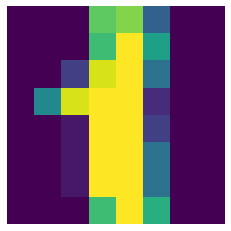

In [8]:
plt.imshow(features.iloc[1].values.reshape(8, 8))
plt.axis("OFF")
plt.show()

## Creating classification (SVM in present scenario) Model without PCA Transformation

In [9]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.15)

In [10]:
classifier = SVC()
classifier.fit(x_train, y_train)

SVC()

In [11]:
y_pred = classifier.predict(x_test)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.97      1.00      0.99        33
           2       1.00      1.00      1.00        24
           3       1.00      0.97      0.98        33
           4       1.00      1.00      1.00        27
           5       1.00      0.95      0.97        19
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        22
           8       0.97      0.97      0.97        30
           9       0.97      1.00      0.98        28

    accuracy                           0.99       270
   macro avg       0.99      0.99      0.99       270
weighted avg       0.99      0.99      0.99       270



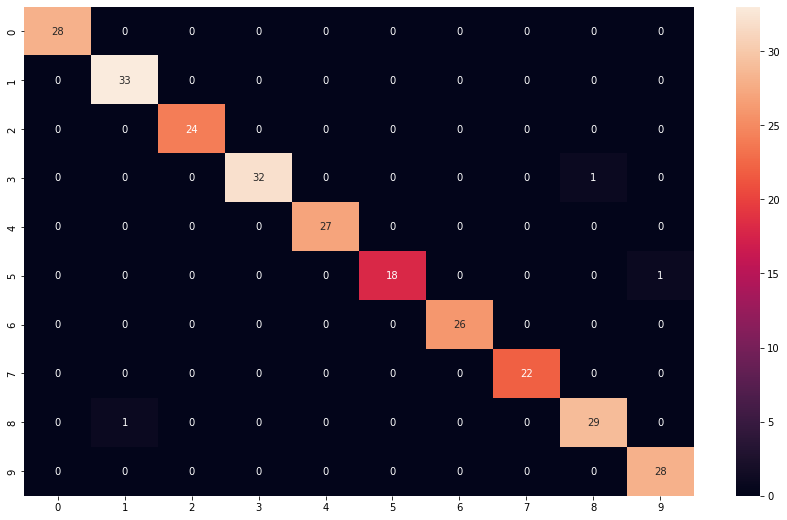

In [13]:
plt.figure(figsize = (15, 9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [14]:
# Printing accuracy Score
from sklearn.metrics import accuracy_score

In [15]:
print("Accuracy Score without PCA Transformation = " + str(round(accuracy_score(y_test, y_pred), 2) * 100) + "%")

Accuracy Score without PCA Transformation = 99.0%


## Creating classification (SVM in present scenario) Model with PCA Transformation!

In [16]:
dim_reducer = PCA(9) # Extracting 9 Most Dominant Principal Componenets

In [17]:
Dim_Red_Features = dim_reducer.fit_transform(features)

In [18]:
# Variance of every component
dim_reducer.explained_variance_

array([0.70710549, 0.64546496, 0.55874122, 0.39693537, 0.27379987,
       0.23148734, 0.20298315, 0.1755218 , 0.15861644])

In [19]:
# Ratio of Variance of every component
dim_reducer.explained_variance_ratio_

array([0.14815157, 0.13523675, 0.11706654, 0.08316524, 0.0573661 ,
       0.04850084, 0.04252869, 0.03677504, 0.03323305])

In [20]:
print("We have captured {:.2f}% variance of the complete dataset!".format(
    np.sum(dim_reducer.explained_variance_ratio_ * 100)))

We have captured 70.20% variance of the complete dataset!


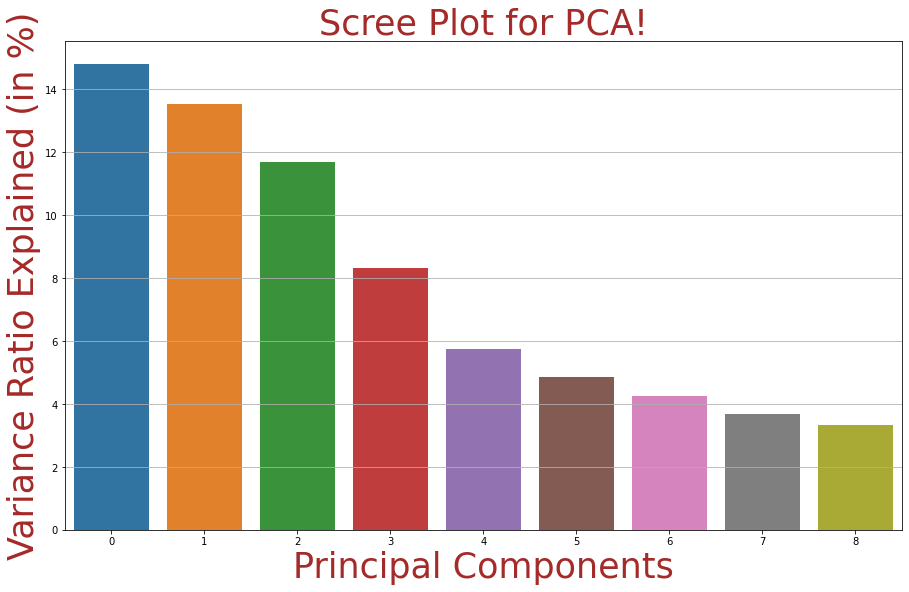

In [21]:
plt.figure(figsize = (15, 9))
sns.barplot(x = list(range(9)), y = dim_reducer.explained_variance_ratio_ * 100)
plt.grid(axis = "y")
plt.xlabel("Principal Components", size = 35, c = "brown")
plt.ylabel("Variance Ratio Explained (in %)", size = 35, c = 'brown')
plt.title("Scree Plot for PCA!", size = 35, c = "brown")
plt.show()

In [22]:
x_train, x_test, y_train, y_test = train_test_split(Dim_Red_Features, target, test_size = 0.15)

In [23]:
classifier2 = SVC()
classifier2.fit(x_train, y_train)

SVC()

In [24]:
y_pred = classifier2.predict(x_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        32
           4       0.96      0.96      0.96        26
           5       1.00      0.97      0.98        31
           6       1.00      1.00      1.00        26
           7       0.96      1.00      0.98        27
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00        27

    accuracy                           0.99       270
   macro avg       0.99      0.99      0.99       270
weighted avg       0.99      0.99      0.99       270



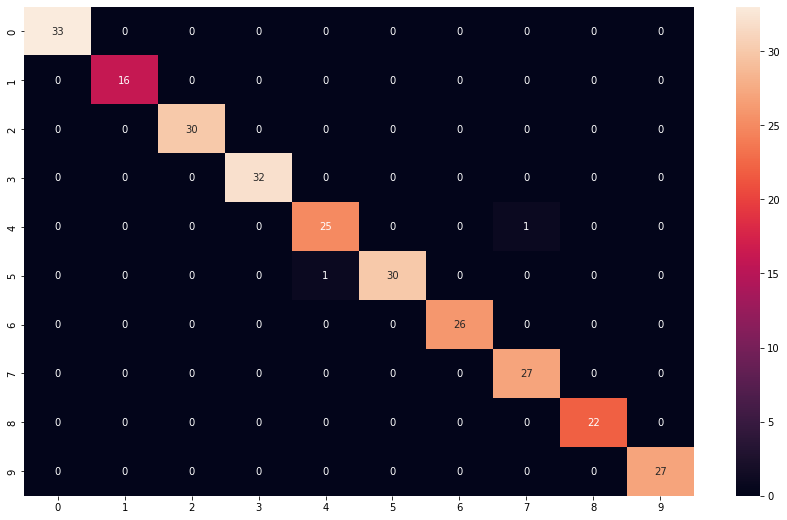

In [26]:
plt.figure(figsize = (15, 9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [27]:
print("Accuracy Score without PCA Transformation = " + str(round(accuracy_score(y_test, y_pred), 2) * 100) + "%")

Accuracy Score without PCA Transformation = 99.0%


***Even by using 9 Principal Components instead of 64, the output is awesome i.e. same accuracy!***